In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import metrics

In [26]:
data_5G=pd.read_csv('/content/Quality_of_Service_5G.csv' )

###1. Exploratory Data Analysis (EDA)

In [27]:
data_5G.shape

(400, 8)

In [28]:
data_5G.head()
#data_5G.tail()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [29]:
data_5G.info()
#data_5G.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [30]:
#data_5G['Timestamp'].nunique()
data_5G['Timestamp'].unique()

array(['9/3/2023 10:00', '9/3/2023 10:01', '9/3/2023 10:02',
       '9/3/2023 10:03', '9/3/2023 10:04', '9/3/2023 10:05',
       '9/3/2023 10:06'], dtype=object)

In [31]:
data_5G['User_ID'].nunique()
#data_5G['User_ID'].unique()

400

In [32]:
#data_5G['Application_Type'].nunique()
data_5G['Application_Type'].unique()

array(['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service',
       'Online_Gaming', 'Background_Download', 'Web_Browsing',
       'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call'],
      dtype=object)

In [33]:
#data_5G['Signal_Strength'].nunique()
data_5G['Signal_Strength'].unique()

array(['-75 dBm', '-80 dBm', '-85 dBm', '-70 dBm', '-78 dBm', '-90 dBm',
       '-88 dBm', '-95 dBm', '-82 dBm', '-76 dBm', '-79 dBm', '-87 dBm',
       '-81 dBm', '-74 dBm', '-84 dBm', '-69 dBm', '-91 dBm', '-96 dBm',
       '-83 dBm', '-77 dBm', '-86 dBm', '-73 dBm', '-68 dBm', '-92 dBm',
       '-97 dBm', '-72 dBm', '-67 dBm', '-93 dBm', '-98 dBm', '-71 dBm',
       '-66 dBm', '-94 dBm', '-99 dBm', '-89 dBm', '-65 dBm', '-100 dBm',
       '-64 dBm', '-101 dBm', '-63 dBm', '-102 dBm', '-62 dBm',
       '-103 dBm', '-61 dBm', '-104 dBm', '-60 dBm', '-59 dBm', '-58 dBm',
       '-57 dBm', '-56 dBm', '-55 dBm', '-54 dBm', '-53 dBm', '-52 dBm',
       '-51 dBm', '-105 dBm', '-50 dBm', '-106 dBm', '-107 dBm',
       '-49 dBm', '-108 dBm', '-109 dBm', '-48 dBm', '-110 dBm',
       '-111 dBm', '-47 dBm', '-112 dBm', '-113 dBm', '-46 dBm',
       '-114 dBm', '-115 dBm', '-45 dBm', '-116 dBm', '-44 dBm',
       '-117 dBm', '-118 dBm', '-43 dBm', '-119 dBm', '-42 dBm',
       '-120 dBm', '-121

In [34]:
#data_5G['Latency'].nunique()
data_5G['Latency'].unique()

array(['30 ms', '20 ms', '40 ms', '10 ms', '25 ms', '50 ms', '100 ms',
       '35 ms', '45 ms', '32 ms', '24 ms', '28 ms', '22 ms', '29 ms',
       '38 ms', '9 ms', '48 ms', '105 ms', '34 ms', '31 ms', '23 ms',
       '21 ms', '37 ms', '8 ms', '47 ms', '110 ms', '33 ms', '27 ms',
       '36 ms', '7 ms', '46 ms', '26 ms', '104 ms', '103 ms', '102 ms',
       '19 ms', '6 ms', '44 ms', '101 ms', '18 ms', '43 ms', '17 ms',
       '42 ms', '99 ms', '5 ms', '49 ms', '51 ms', '52 ms', '53 ms',
       '54 ms', '55 ms', '56 ms', '39 ms', '16 ms', '57 ms', '15 ms',
       '58 ms', '41 ms', '14 ms', '59 ms', '13 ms', '60 ms', '12 ms',
       '61 ms', '11 ms', '62 ms', '63 ms', '64 ms', '65 ms', '66 ms',
       '67 ms', '68 ms', '4 ms', '69 ms', '3 ms', '70 ms', '2 ms',
       '71 ms', '1 ms', '72 ms', '0 ms', '73 ms', '74 ms', '75 ms',
       '76 ms', '77 ms', '78 ms'], dtype=object)

In [35]:
#data_5G['Required_Bandwidth'].nunique()
data_5G['Required_Bandwidth'].unique()

array(['10 Mbps', '100 Kbps', '5 Mbps', '1 Mbps', '2 Mbps', '500 Kbps',
       '10 Kbps', '3 Mbps', '12 Mbps', '2.5 Mbps', '1.2 Mbps', '150 Kbps',
       '4.5 Mbps', '600 Kbps', '8 Kbps', '3.2 Mbps', '11 Mbps',
       '2.2 Mbps', '1.4 Mbps', '160 Kbps', '10.5 Mbps', '4.2 Mbps',
       '1.1 Mbps', '620 Kbps', '7 Kbps', '3.4 Mbps', '10.2 Mbps',
       '2.3 Mbps', '1.3 Mbps', '170 Kbps', '10.8 Mbps', '4.0 Mbps',
       '1.0 Mbps', '630 Kbps', '6 Kbps', '3.5 Mbps', '2.4 Mbps',
       '165 Kbps', '3.8 Mbps', '640 Kbps', '5 Kbps', '3.6 Mbps',
       '2.6 Mbps', '10.7 Mbps', '4.1 Mbps', '650 Kbps', '4 Kbps',
       '3.7 Mbps', '10.3 Mbps', '2.7 Mbps', '155 Kbps', '10.9 Mbps',
       '4.3 Mbps', '660 Kbps', '3 Kbps', '2.8 Mbps', '0.9 Mbps',
       '11.0 Mbps', '4.4 Mbps', '670 Kbps', '2 Kbps', '3.9 Mbps',
       '2.9 Mbps', '0.8 Mbps', '145 Kbps', '11.2 Mbps', '680 Kbps',
       '1 Kbps', '3.0 Mbps', '0.7 Mbps', '140 Kbps', '11.4 Mbps',
       '4.6 Mbps', '690 Kbps', '3.1 Mbps', '1.5 Mbps', '1

In [36]:
#data_5G['Allocated_Bandwidth'].nunique()
data_5G['Allocated_Bandwidth'].unique()

array(['15 Mbps', '120 Kbps', '6 Mbps', '1.5 Mbps', '3 Mbps', '550 Kbps',
       '1 Mbps', '15 Kbps', '3.5 Mbps', '2 Mbps', '14 Mbps', '2.8 Mbps',
       '1.2 Mbps', '170 Kbps', '12 Mbps', '5 Mbps', '1.3 Mbps',
       '600 Kbps', '9 Kbps', '13 Mbps', '2.5 Mbps', '1.4 Mbps',
       '180 Kbps', '12.5 Mbps', '4.8 Mbps', '620 Kbps', '8 Kbps',
       '3.7 Mbps', '12.2 Mbps', '2.6 Mbps', '190 Kbps', '12.8 Mbps',
       '4.6 Mbps', '1.1 Mbps', '630 Kbps', '7 Kbps', '3.8 Mbps',
       '12.3 Mbps', '2.7 Mbps', '185 Kbps', '12.6 Mbps', '4.4 Mbps',
       '640 Kbps', '6 Kbps', '3.9 Mbps', '2.9 Mbps', '4.7 Mbps',
       '650 Kbps', '5 Kbps', '4.0 Mbps', '12.1 Mbps', '3.0 Mbps',
       '1.0 Mbps', '12.4 Mbps', '4.9 Mbps', '660 Kbps', '4 Kbps',
       '4.1 Mbps', '3.1 Mbps', '0.9 Mbps', '175 Kbps', '5.0 Mbps',
       '670 Kbps', '3 Kbps', '4.2 Mbps', '12.0 Mbps', '3.2 Mbps',
       '0.8 Mbps', '5.1 Mbps', '680 Kbps', '2 Kbps', '4.3 Mbps',
       '3.3 Mbps', '0.7 Mbps', '165 Kbps', '12.7 Mbps', '5.2 

In [37]:
#data_5G['Resource_Allocation'].nunique()
data_5G['Resource_Allocation'].unique()


array(['70%', '80%', '75%', '90%', '85%', '60%', '50%', '65%', '55%'],
      dtype=object)

In [38]:
data_5G['Signal_Strength']= data_5G['Signal_Strength'].str.replace('dBm','').astype(float)
data_5G['Latency'] = data_5G['Latency'].str.replace('ms','').astype(float)
data_5G['Resource_Allocation']= data_5G['Resource_Allocation'].str.replace('%','').astype(float)

In [39]:
data_5G.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75.0,30.0,10 Mbps,15 Mbps,70.0
1,9/3/2023 10:00,User_2,Voice_Call,-80.0,20.0,100 Kbps,120 Kbps,80.0
2,9/3/2023 10:00,User_3,Streaming,-85.0,40.0,5 Mbps,6 Mbps,75.0
3,9/3/2023 10:00,User_4,Emergency_Service,-70.0,10.0,1 Mbps,1.5 Mbps,90.0
4,9/3/2023 10:00,User_5,Online_Gaming,-78.0,25.0,2 Mbps,3 Mbps,85.0


In [40]:
def convert_bw(bw_str):
    if 'Mbps' in bw_str:
        bw = float(bw_str.replace('Mbps',''))
        return bw * 1024
    elif 'Kbps' in bw_str:
        bw = float(bw_str.replace('Kbps',''))
        return bw
    else:
        return 0

In [41]:
data_5G['Required_Bandwidth'] = data_5G['Required_Bandwidth'].apply(convert_bw)
data_5G['Allocated_Bandwidth'] = data_5G['Allocated_Bandwidth'].apply(convert_bw)

In [42]:
data_5G.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75.0,30.0,10240.0,15360.0,70.0
1,9/3/2023 10:00,User_2,Voice_Call,-80.0,20.0,100.0,120.0,80.0
2,9/3/2023 10:00,User_3,Streaming,-85.0,40.0,5120.0,6144.0,75.0
3,9/3/2023 10:00,User_4,Emergency_Service,-70.0,10.0,1024.0,1536.0,90.0
4,9/3/2023 10:00,User_5,Online_Gaming,-78.0,25.0,2048.0,3072.0,85.0


In [43]:
data_5G.describe()

,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-80.495000,33.825000,3208.976500,3584.580000,74.712500
std,20.701119,21.122139,4080.900204,4569.116837,8.982291
min,-123.000000,0.000000,0.000000,0.000000,50.000000
25%,-98.000000,21.750000,417.500000,417.500000,70.000000
50%,-83.000000,31.000000,1228.800000,1382.400000,70.000000
75%,-64.000000,45.000000,4198.400000,4531.200000,80.000000
max,-40.000000,110.000000,14848.000000,16179.200000,90.000000


In [44]:
data_5G[['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth', 'Resource_Allocation']].describe()

,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-80.495000,33.825000,3208.976500,3584.580000,74.712500
std,20.701119,21.122139,4080.900204,4569.116837,8.982291
min,-123.000000,0.000000,0.000000,0.000000,50.000000
25%,-98.000000,21.750000,417.500000,417.500000,70.000000
50%,-83.000000,31.000000,1228.800000,1382.400000,70.000000
75%,-64.000000,45.000000,4198.400000,4531.200000,80.000000
max,-40.000000,110.000000,14848.000000,16179.200000,90.000000


In [45]:
data_5G = data_5G.query("Required_Bandwidth != 0")

# Label Encoding the Application_Type Data

In [46]:
label_encoder = LabelEncoder()
data_5G['Application_Type'] = label_encoder.fit_transform(data_5G['Application_Type'])

<ipython-input-46-8baf08f42723>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5G['Application_Type'] = label_encoder.fit_transform(data_5G['Application_Type'])


In [47]:
data_5G.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,6,-75.0,30.0,10240.0,15360.0,70.0
1,9/3/2023 10:00,User_2,9,-80.0,20.0,100.0,120.0,80.0
2,9/3/2023 10:00,User_3,5,-85.0,40.0,5120.0,6144.0,75.0
3,9/3/2023 10:00,User_4,1,-70.0,10.0,1024.0,1536.0,90.0
4,9/3/2023 10:00,User_5,4,-78.0,25.0,2048.0,3072.0,85.0


In [48]:
data_5G['Bandwidth_Util_ratio'] = data_5G['Allocated_Bandwidth']/data_5G['Required_Bandwidth']
data_5G.head()

<ipython-input-48-7a508fa66a58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5G['Bandwidth_Util_ratio'] = data_5G['Allocated_Bandwidth']/data_5G['Required_Bandwidth']


,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Bandwidth_Util_ratio
0,9/3/2023 10:00,User_1,6,-75.0,30.0,10240.0,15360.0,70.0,1.5
1,9/3/2023 10:00,User_2,9,-80.0,20.0,100.0,120.0,80.0,1.2
2,9/3/2023 10:00,User_3,5,-85.0,40.0,5120.0,6144.0,75.0,1.2
3,9/3/2023 10:00,User_4,1,-70.0,10.0,1024.0,1536.0,90.0,1.5
4,9/3/2023 10:00,User_5,4,-78.0,25.0,2048.0,3072.0,85.0,1.5


# Splitting the data (features) and Target (label)

In [49]:
X= data_5G.drop(['Timestamp','User_ID','Required_Bandwidth','Allocated_Bandwidth','Resource_Allocation'],axis=1)
Y= data_5G['Resource_Allocation']

In [50]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Splitting the data in Train and Test Data

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(393, 4) (235, 4) (158, 4)


# Model Training

XGBoost Regressor (Decision Tree Ensemble Model)


In [52]:
#loading the model
model= RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

# Evaluation


Prediction on Training Data and Test Data

In [53]:
# Accuracy on prediction on train data
train_data_pred= model.predict(X_train)
# Accuracy on prediction on test data
test_data_pred= model.predict(X_test)

In [54]:
#print(train_data_pred)

In [55]:
# R-squared error
train_score_1 = metrics.r2_score(Y_train,train_data_pred)
# Mean absolute error
train_score_2 = metrics.mean_absolute_error(Y_train,train_data_pred)
# R-squared error
test_score_1 = metrics.r2_score(Y_test,test_data_pred)
# Mean absolute error
test_score_2 = metrics.mean_absolute_error(Y_test,test_data_pred)

In [56]:
print(train_score_1,train_score_2,test_score_1,test_score_2)

print('The r2 score accuracy on Train Data is {}%'.format(round(train_score_1, 2) *100))
print('The r2 score accuracy on Test Data is {}%'.format(round(test_score_1, 2) *100))
score1 = train_score_2
score2 = test_score_2
print("The Mean Absolute Error on Train Data is {}".format(round(score1, 2)))
print("The Mean Absolute Error on Test Data is {}".format(round(score2, 2)))

score1 = np.sqrt(train_score_2)
score2 = np.sqrt(test_score_2)
print("The Root Mean Squared Error on Train Data is {}".format(round(score1, 2)))
print("The Root Mean Squared Error on Test Data is {}".format(round(score2, 2)))

0.9914097225396535 0.24808510638297848 0.853398149944844 0.9598101265822779
The r2 score accuracy on Train Data is 99.0%
The r2 score accuracy on Test Data is 85.0%
The Mean Absolute Error on Train Data is 0.25
The Mean Absolute Error on Test Data is 0.96
The Root Mean Squared Error on Train Data is 0.5
The Root Mean Squared Error on Test Data is 0.98


# Visualizing the actual and Predicted Resource Allocation

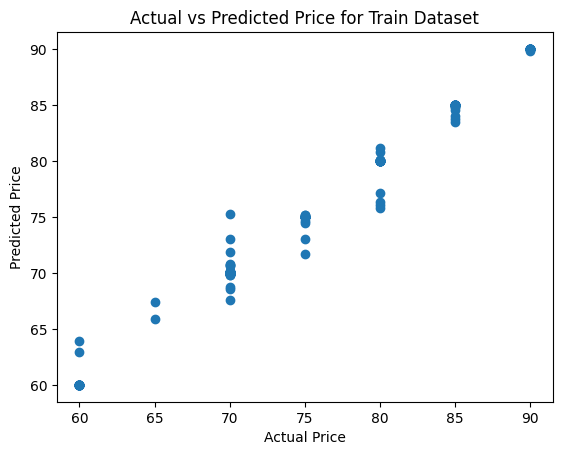

In [57]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Resource Allocation")
plt.ylabel("Predicted Resource Allocation")
plt.title("Actual vs Predicted Resource Allocation for Train Dataset")
plt.show()

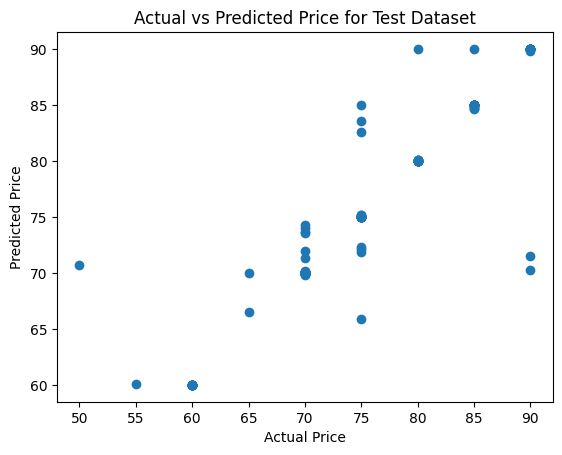

In [58]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Resource Allocation")
plt.ylabel("Predicted Resource Allocation")
plt.title("Actual vs Predicted Resource Allocation for Test Dataset")
plt.show()

## Saving Trained Model

In [59]:
import pickle

In [62]:
file_name = 'resource_allocation_optimization_5G.sav'
pickle.dump(model, open(file_name,'wb'))

encoder_file = 'App_type_label_encoder.pkl'
pickle.dump(label_encoder, open(encoder_file,'wb'))

scaler_file = 'RA_5G_scaler.pkl'
pickle.dump(scaler, open(scaler_file,'wb'))

## Loading the saved model , encoder and scaler

In [63]:
loaded_model=pickle.load(open('resource_allocation_optimization_5G.sav','rb'))

label_encoder = pickle.load(open('App_type_label_encoder.pkl','rb'))

scaler = pickle.load(open('RA_5G_scaler.pkl','rb'))

Predicting the Value based on input

In [72]:
input_data = ('Video_Call',-75,30,10240,15360) #70%
#input_data = ('Background_Download',-91,48,600,600) #55%

application_type_encoded = label_encoder.transform([input_data[0]])[0]

signal_strength = input_data[1]
latency_in_ms = input_data[2]
bandwidth_utilization = input_data[3]/input_data[4]

input_data_processed = np.array([[application_type_encoded,signal_strength,latency_in_ms,bandwidth_utilization]])

std_data = scaler.transform(input_data_processed)

prediction = model.predict(std_data)
print(f"Predicted Resource Allocation: {prediction[0]:.2f}%")

Predicted Resource Allocation: 67.65%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
